In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

import warnings
warnings.filterwarnings('ignore')

In [138]:
walmart = pd.read_csv('walmart.csv')
target = pd.read_csv('target.csv')
amazon = pd.read_csv('amazon.csv')
costco = pd.read_csv('costco.csv')
kroger = pd.read_csv('kroger.csv')

In [139]:
df = pd.concat(map(pd.read_csv, ['walmart.csv', 'target.csv','amazon.csv','costco.csv','kroger.csv']),ignore_index = True)

In [140]:
df.tail()

,year,company,tokens_final
3710,2019,Kroger,"['company', 'termination', 'cause', 'treatment..."
3711,2019,Kroger,"['purpose', 'approve', 'company', 'provide', '..."
3712,2019,Kroger,"['security', 'restriction', 'represent', 'book..."
3713,2019,Kroger,"['case', 'rate', 'jurisdiction', 'approve', 'd..."
3714,2019,Kroger,"['company', 'extent', 'deems', 'discretion', '..."


In [141]:
df.loc[:,'tokens_final'] = df.loc[:,'tokens_final'].apply(lambda x: literal_eval(x))

### Additional Text Pre-processing

In [142]:
def replace_in_list(lis, old, new):
    for i in range(len(lis)):
        if lis[i] == old:
            lis[i] = new
    return(lis)

df['tokens_final'] = df['tokens_final'].map(lambda x: replace_in_list(x,"employee", "associate"))
df['tokens_final'] = df['tokens_final'].map(lambda x: replace_in_list(x,"guest", "customer"))
#df['tokens_final'] = df['tokens_final'].map(lambda x: replace_in_list(x,"member", "customer"))
df['tokens_final'] = df['tokens_final'].map(lambda x: replace_in_list(x,"consumer", "customer"))

In [143]:
remove_words =['performance','officer','value','award','amount','cash','chairman','vice','option','president',
              'base','inc.','grant','voting','election','unit','audit','benefit','date','service','management','include',
              'number','name','person','proposal','section','report','cost','receive','pension','rate','interest',
              'fuel','rate','serve','sale','pension']

df["tokens_final"] = df["tokens_final"].map(lambda x: [word for word in x if word.lower() not in remove_words])

In [144]:
import gensim
from gensim.utils import simple_preprocess
from gensim.test.utils import common_corpus, common_dictionary

import pprint
pp = pprint.PrettyPrinter(indent=4)

In [145]:
dictionary = gensim.corpora.Dictionary(df["tokens_final"])

dictionary.filter_extremes(no_below=1, no_above=0.5) #, keep_n=100000)

bow_corpus = [dictionary.doc2bow(word) for word in df["tokens_final"]]

lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=15, id2word=dictionary, 
                                       passes=2, workers=2, chunksize=100, random_state=1000)

In [146]:
pp.pprint(lda_model.print_topics())

[   (   0,
        '0.243*"ownership" + 0.109*"guideline" + 0.052*"policy" + '
        '0.034*"clawback" + 0.032*"hold" + 0.029*"require" + 0.027*"equity" + '
        '0.020*"compliance" + 0.019*"recovery" + 0.015*"time"'),
    (   1,
        '0.044*"vest" + 0.035*"termination" + 0.030*"restrict" + 0.027*"group" '
        '+ 0.026*"employment" + 0.021*"period" + 0.021*"payment" + '
        '0.019*"exercise" + 0.018*"control" + 0.017*"equity"'),
    (   2,
        '0.028*"asset" + 0.020*"bonus" + 0.019*"income" + 0.018*"change" + '
        '0.016*"estimate" + 0.015*"liability" + 0.014*"flow" + 0.014*"price" + '
        '0.014*"period" + 0.013*"earnings"'),
    (   3,
        '0.082*"store" + 0.030*"retainer" + 0.028*"division" + '
        '0.023*"presentation" + 0.021*"welfare" + 0.020*"operate" + '
        '0.016*"michael" + 0.016*"christopher" + 0.015*"merchandise" + '
        '0.013*"relationship"'),
    (   4,
        '0.030*"increase" + 0.027*"goal" + 0.025*"compare" + 0.023*"targe

In [147]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)

In [148]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.171124 -0.102211       1        1  10.406455
14    -0.226955  0.116502       2        1   9.937639
2     -0.224025  0.048857       3        1   9.865681
13     0.079297 -0.137575       4        1   9.565880
10     0.015183  0.095516       5        1   8.960377
6     -0.022868 -0.034684       6        1   8.648129
9      0.172569 -0.214977       7        1   7.940876
1     -0.199923  0.042299       8        1   7.677671
7      0.112368 -0.140077       9        1   7.204886
5      0.244008  0.228140      10        1   5.457208
8      0.166483  0.203925      11        1   4.887461
12    -0.104635 -0.016042      12        1   3.580715
11     0.074525  0.016124      13        1   2.632209
3      0.029661 -0.125038      14        1   2.165354
0      0.055438  0.019242      15        1   1.069467, topic_info=             Term         Freq        Total Category  logprob  loglift
119   transaction  1989.000000  1989.000000  Default  30.0000  30.0000
47      ownership  1486.000000  1486.000000  Default  29.0000  29.0000
2985         rsus  1794.000000  1794.000000  Default  28.0000  28.0000
67          store  1873.000000  1873.000000  Default  27.0000  27.0000
113          risk  2354.000000  2354.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
957    percentage    32.228432  1142.492065  Topic15  -5.0246   0.9699
524      position    32.469143  1272.153564  Topic15  -5.0172   0.8698
913         level    31.617168  1408.866089  Topic15  -5.0438   0.7412
943       reflect    23.932692   767.257935  Topic15  -5.3222   1.0704
931       achieve    24.147293   859.739929  Topic15  -5.3133   0.9656

[1006 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1112      8  0.897946   abbott
309       1  0.095861  ability
309       2  0.159768  ability
309       3  0.017574  ability
309       4  0.581554  ability
...     ...       ...      ...
1232      2  0.063157    yield
1232      3  0.849107    yield
1232      6  0.077192    yield
2157      5  0.972764     zone
2782     11  0.895829    •vote

[4238 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 15, 3, 14, 11, 7, 10, 2, 8, 6, 9, 13, 12, 4, 1])

In [149]:
def format_topics_pages(ldamodel=lda_model, corpus=bow_corpus, texts=df[['year','company','tokens_final']]):
    # Init output
    page_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                page_topics_df = page_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    page_topics_df.columns = ['topic', 'perc_contribution', 'topic_keywords']

    # Add original text to the end of the output
    page_topics_df = pd.concat([texts,page_topics_df], axis=1)
    return(page_topics_df)


df_topic_pages_keywords = format_topics_pages(ldamodel=lda_model, corpus=bow_corpus, texts=df[['year','company','tokens_final']])

# Format
df_dominant_topic = df_topic_pages_keywords.reset_index()
df_dominant_topic = df_dominant_topic.drop('index',axis=1)

# Show
df_dominant_topic.head(10)

,year,company,tokens_final,topic,perc_contribution,topic_keywords
0,2010,Walmart,"[street, website, www.walmartstores.com, notic...",5.0,0.7727,"material, copy, access, notice, internet, inst..."
1,2010,Walmart,"[wal-mart, store, street, website, www.walmart...",5.0,0.4151,"material, copy, access, notice, internet, inst..."
2,2010,Walmart,"[nonqualified, compensation, potential, paymen...",14.0,0.2976,"participant, payment, contribution, agreement,..."
3,2010,Walmart,"[compensation, store, compensation, amend, jan...",8.0,0.3575,"item, broker, majority, nominee, effect, matte..."
4,2010,Walmart,"[nominee, statement, company, ratification, ap...",8.0,0.9932,"item, broker, majority, nominee, effect, matte..."
5,2010,Walmart,"[effect, broker, broker, occur, register, prov...",8.0,0.7248,"item, broker, majority, nominee, effect, matte..."
6,2010,Walmart,"[revoke, revoke, record, holder, filing, write...",5.0,0.9501,"material, copy, access, notice, internet, inst..."
7,2010,Walmart,"[owner, hold, street, describe, bank, broker, ...",9.0,0.4579,"experience, business, member, leadership, cust..."
8,2010,Walmart,"[michele, burn, burn, mercer, subsidiary, mars...",9.0,0.8446,"experience, business, member, leadership, cust..."
9,2010,Walmart,"[michael, duke, position, appointment, hold, p...",9.0,0.9941,"experience, business, member, leadership, cust..."


In [150]:
df_trend = pd.crosstab([df_dominant_topic["company"],df_dominant_topic["year"]], df_dominant_topic["topic"], normalize="index")
years = [str(x) for x in df_trend.index]

In [151]:
df_trend.columns = ['topic_0','topic_1','topic_2','topic_3','topic_4',
              'topic_5','topic_6','topic_7','topic_8','topic_9','topic_10','topic_11',
              'topic_12','topic_13','topic_14']

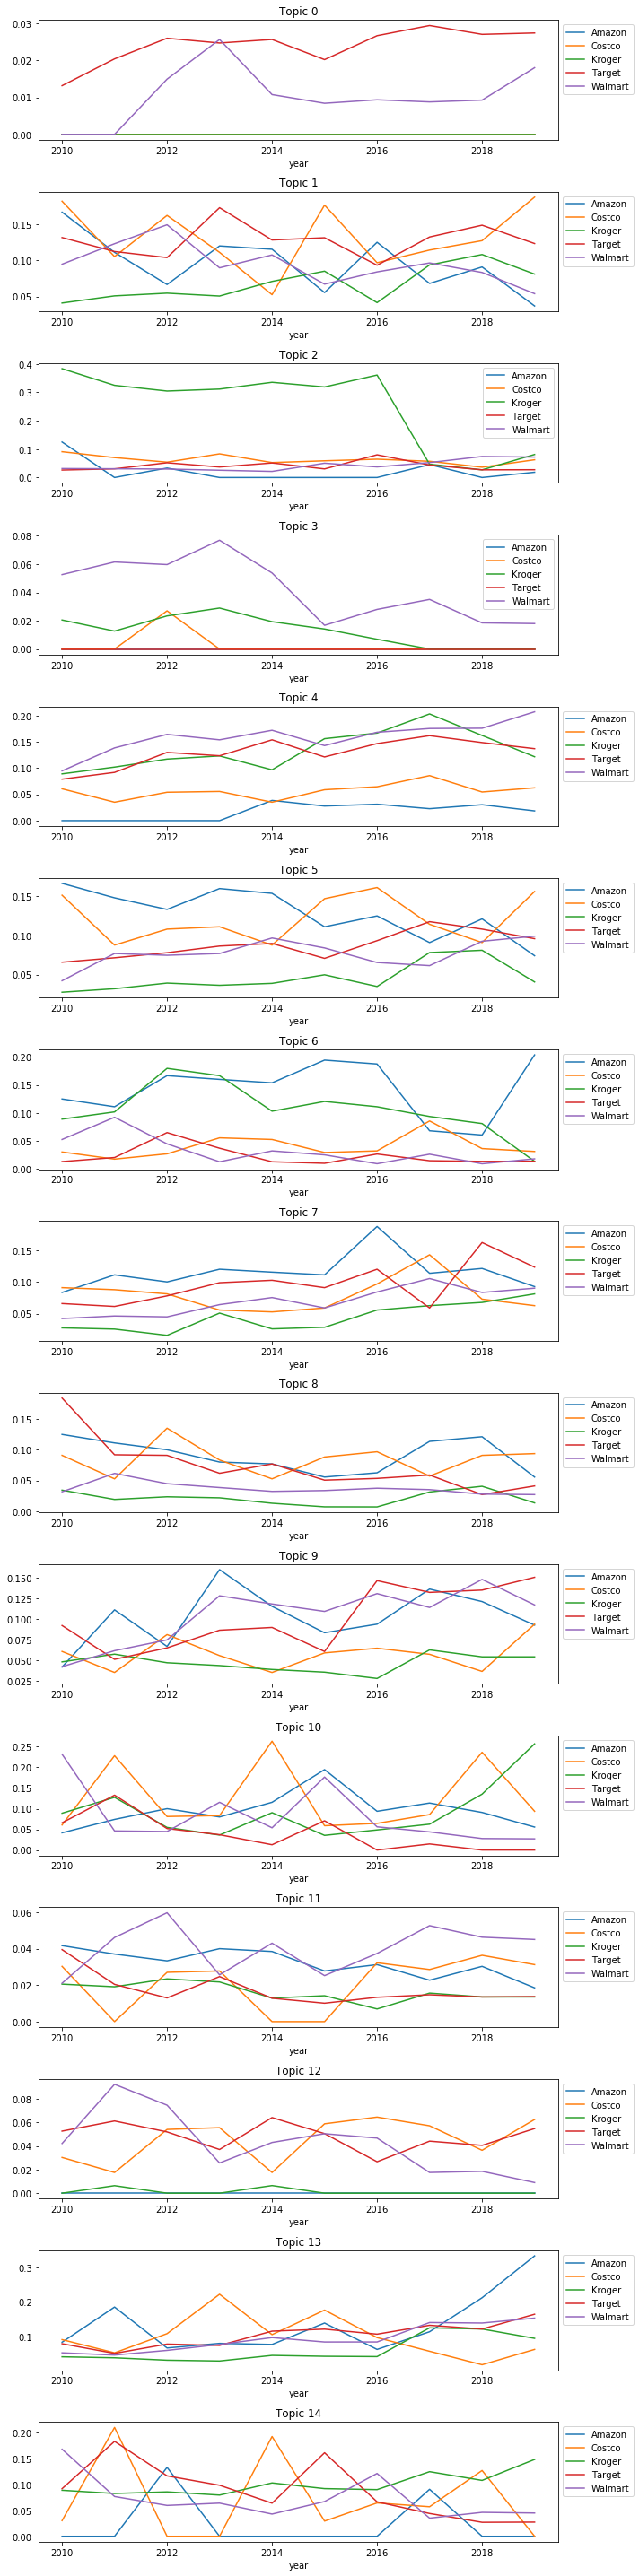

In [152]:
f, a = plt.subplots(15,1,figsize=(10, 40))

df_trend.reset_index().pivot('year','company','topic_0').plot(ax=a[0], title='Topic 0').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_1').plot(ax=a[1], title='Topic 1').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_2').plot(ax=a[2], title='Topic 2').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_3').plot(ax=a[3], title='Topic 3').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_4').plot(ax=a[4], title='Topic 4').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_5').plot(ax=a[5], title='Topic 5').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_6').plot(ax=a[6], title='Topic 6').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_7').plot(ax=a[7], title='Topic 7').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_8').plot(ax=a[8], title='Topic 8').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_9').plot(ax=a[9], title='Topic 9').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_10').plot(ax=a[10], title='Topic 10').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_11').plot(ax=a[11], title='Topic 11').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_12').plot(ax=a[12], title='Topic 12').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_13').plot(ax=a[13], title='Topic 13').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_14').plot(ax=a[14], title='Topic 14').legend(bbox_to_anchor=(1, 1))

f.tight_layout()